<a href="https://colab.research.google.com/github/Welle-Kim/test3/blob/master/02_Modelselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model selection 모듈

- 훈련 데이터와 테스트 테이터로 분리하지 않고 머신러닝 수행

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
dtc = DecisionTreeClassifier(random_state=2022)
dtc.fit(iris.data,iris.target)
dtc.score(iris.data,iris.target)

1.0

- 교차 검증: cross_validate() + budrk
- 교차 검증 후 평가까지: cross_val_score()

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc,iris.data,iris.target,scoring="accuracy",cv=5).mean()

0.9533333333333334

In [7]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

-> 4가지 부분을 조작하는거임


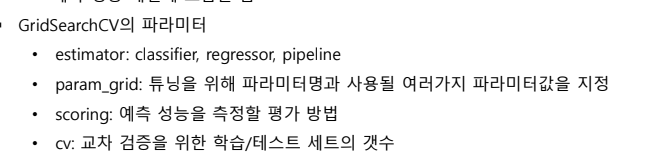

In [8]:
# Train/ Test dataset 분리

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    iris.data,iris.target,random_state=2022      #train:test = 3:1
)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [9]:
dtc=DecisionTreeClassifier(random_state=2022)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [10]:
params={
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[2,3,4]
}

In [12]:
from sklearn.model_selection import GridSearchCV

grid_dt=GridSearchCV(
    dtc,param_grid=params,scoring='accuracy',cv=5
)



In [13]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [14]:
#베스트 파라메터
grid_dt.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [15]:
# 베스트 스코어
grid_dt.best_score_

0.9545454545454547

In [16]:
# 최적의 분류기
# dtc_best = DecisionTreeClassifier(max_depth=3,min_samples_split=2,random_state=2022)
dtc_best=grid_dt.best_estimator_

In [17]:
# 최적의 분류기로 예측 및 평가
dtc_best.score(X_test,y_test)

0.9473684210526315

## SVM 사례

In [19]:
from sklearn.svm import SVC
svc = SVC(random_state=2022)
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 2022,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [20]:
params ={'C':[0.01,0.1,1,10,100]}
grid_sv= GridSearchCV(svc,params,scoring="accuracy",cv=5)

In [21]:
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 10}

In [23]:
#범위를 좁혀가면서 파라메터를 찾음
params ={'C':[0.01,10,100]}
grid_sv= GridSearchCV(svc,params,scoring="accuracy",cv=5)
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 10}

In [25]:
#범위를 좁혀가면서 파라메터를 찾음
params ={'C':[10,100,6,7,8]}
grid_sv= GridSearchCV(svc,params,scoring="accuracy",cv=5)
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 7}

In [26]:
#범위를 좁혀가면서 파라메터를 찾음
params ={'C':[10,100,5,7]}
grid_sv= GridSearchCV(svc,params,scoring="accuracy",cv=5)
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 7}

In [27]:
#범위를 좁혀가면서 파라메터를 찾음
params ={'C':[10,100,6,7,8,9]}
grid_sv= GridSearchCV(svc,params,scoring="accuracy",cv=5)
grid_sv.fit(X_train,y_train)
grid_sv.best_params_

{'C': 7}